In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data Files

In [2]:
mt_p = pd.read_csv("mt_products.csv")                      # reads mt_product.csv file and store it in mt_p object

mt_sales = pd.read_csv("sales.csv", parse_dates= ["Date"]) # reads sales.csv file and assin it to mt_sales object

mt_store = pd.read_csv("stores.csv")                       # reads stores.csv file and assin it to mt_store object

mt_inv = pd.read_csv("inventory.csv")                      # reads inventory.csv file and assin it to mt_inv object  

## Preparing products dataset for analysis 
performing calculations on mt_p columns to calculate new columns (revenue, profit margin, profit, cost of good sold) and adding the new columns to mt_products

In [3]:
mt_s = pd.DataFrame(mt_sales.groupby(["Product_ID"])["Units"].sum()).reset_index() # sum all units sold from each product and save output in a DataFrame mt_s 
mt_s.rename(columns={"Units": "Units_Sold"}, inplace = True) # rename column Units to Units_Sold 

mt_products = pd.merge(mt_p, mt_s, how="left")                     # merge on indecies while maintaing the indexing of the left dataframe.
mt_products.head()                                                 # show first five rows of the dataframe products_with_revenue

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price,Units_Sold
0,1,Action Figure,Toys,9.99,15.99,57958
1,10,Dinosaur Figures,Toys,10.99,14.99,29012
2,11,Etch A Sketch,Art & Crafts,10.99,20.99,12168
3,12,Foam Disk Launcher,Sports & Outdoors,8.99,11.99,7620
4,13,Gamer Headphones,Electronics,14.99,20.99,17958


### Total Revenue Generated by a Product = Units Sold from Product * Product Price 

In [4]:
# Calculating Revenue                                                
mt_products["Product_Revenue"] = mt_products["Units_Sold"] * mt_products["Product_Price"] # calculates the revenue generated by each product and store results in new column in mt_products dataframe
mt_products.sort_values(by= ["Product_Name"] , inplace = True)                            # sort dataframe by Product_Name in alphapitical order                                                                                

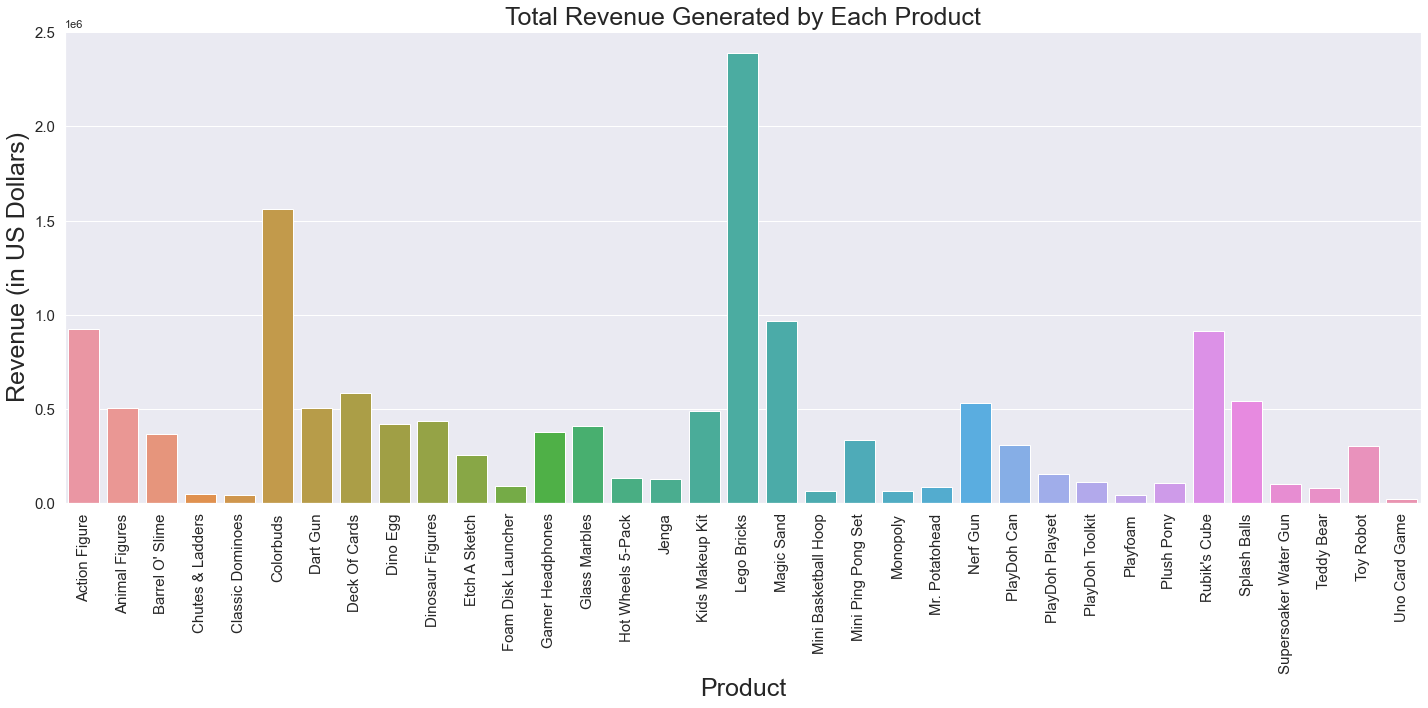

In [5]:
# graphing Total Revenue Generated by Each Product
sns.set(rc={"figure.figsize":(20,10)})
ax = sns.barplot( x = mt_products["Product_Name"], y = mt_products["Product_Revenue"])    # increases size of grahp figure

ax.set_xlabel("Product" , fontsize = 25)
ax.set_ylabel("Revenue (in US Dollars)", fontsize = 25)
ax.set_title("Total Revenue Generated by Each Product", fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)                    # rotate the products_Name in x-axis by 90 degress for a better display                                                  
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.savefig("Total Revenue Generated by Each Product", dpi=1200)

### Calculating Cost of Good Sold
COGS = Units Sold from Product * Product Cost

In [6]:
# Calculating Cost of Good Sold and store results in new column in mt_products dataframe
mt_products["COGS"] = mt_products.Units_Sold*mt_products.Product_Cost

### Calculationg Profit Margin For Each Product
Profit Margin = [Product Revenue - (Product Cost * Units Sold)] / Product Revenue

In [7]:
# calculate profit margin and store results in new column in mt_products dataframe
mt_products["Profit_Margin"] = (mt_products.Product_Revenue - (mt_products.Product_Cost * mt_products.Units_Sold))/mt_products.Product_Revenue

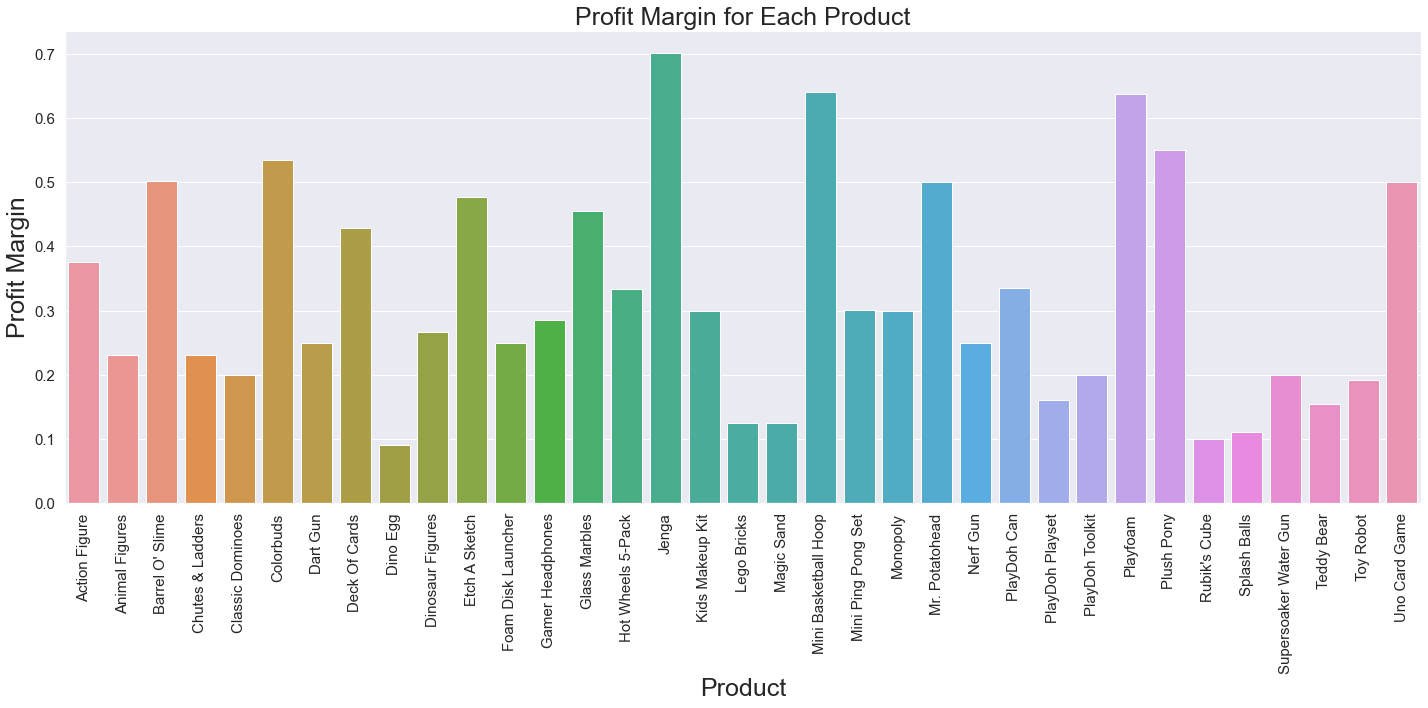

In [8]:
# graphing Profit Margin for Each Product
sns.set(rc={"figure.figsize":(20,10)})
ax1 = sns.barplot( x = mt_products["Product_Name"], y = mt_products["Profit_Margin"])

ax1.set_xlabel("Product" , fontsize = 25)
ax1.set_ylabel("Profit Margin" , fontsize = 25)
ax1.set_title("Profit Margin for Each Product" , fontsize = 25)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.tight_layout()
fig1 = plt.gcf()
plt.show()
#fig1.savefig("Profit Margin for Each Product" , dpi = 1200)

### Calculating Profit of Each Product
Profit = Product Revenue - Cost of Good Sold of Product

In [9]:
# Calculate profit for each product and store results in new column in mt_products dataframe
mt_products["Profit"] = mt_products.Product_Revenue - mt_products.COGS

### Finding linear correlations between variables (columns in mt_products dataframe)

In [10]:
# run correlation analysis on mt_products columns
# exclude the Product_ID column from the analysis 
corr = mt_products.drop(['Product_ID'], axis = 1).corr(method = "pearson") 
corr

,Product_Cost,Product_Price,Units_Sold,Product_Revenue,COGS,Profit_Margin,Profit
Product_Cost,1.000000,0.906848,-0.111982,0.561679,0.674898,-0.551708,0.055583
Product_Price,0.906848,1.000000,-0.217888,0.484241,0.549671,-0.202333,0.131004
Units_Sold,-0.111982,-0.217888,1.000000,0.619595,0.504423,-0.039252,0.681136
Product_Revenue,0.561679,0.484241,0.619595,1.000000,0.962715,-0.234919,0.715663
COGS,0.674898,0.549671,0.504423,0.962715,1.000000,-0.374936,0.500038
Profit_Margin,-0.551708,-0.202333,-0.039252,-0.234919,-0.374936,1.000000,0.216002
Profit,0.055583,0.131004,0.681136,0.715663,0.500038,0.216002,1.000000


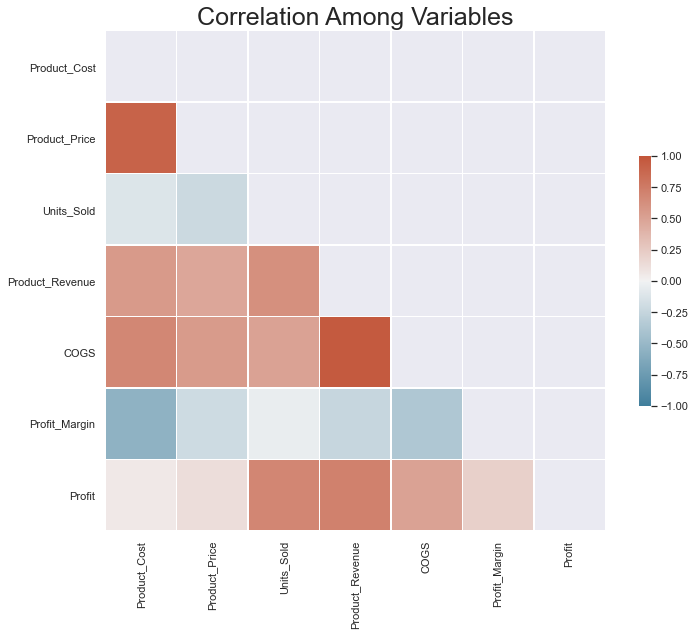

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig2, ax2 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax2.set_title("Correlation Among Variables" , fontsize = 25)
plt.tight_layout()
fig2 = plt.gcf()
plt.show()
#fig2.savefig("Correlation Among Variables" , dpi = 1200)

## Top Selling Products

#### performing grouping, aggregation, and megering between the sales, product, and store datasets to visualize top selling products and the number of stores where products ranked high selling

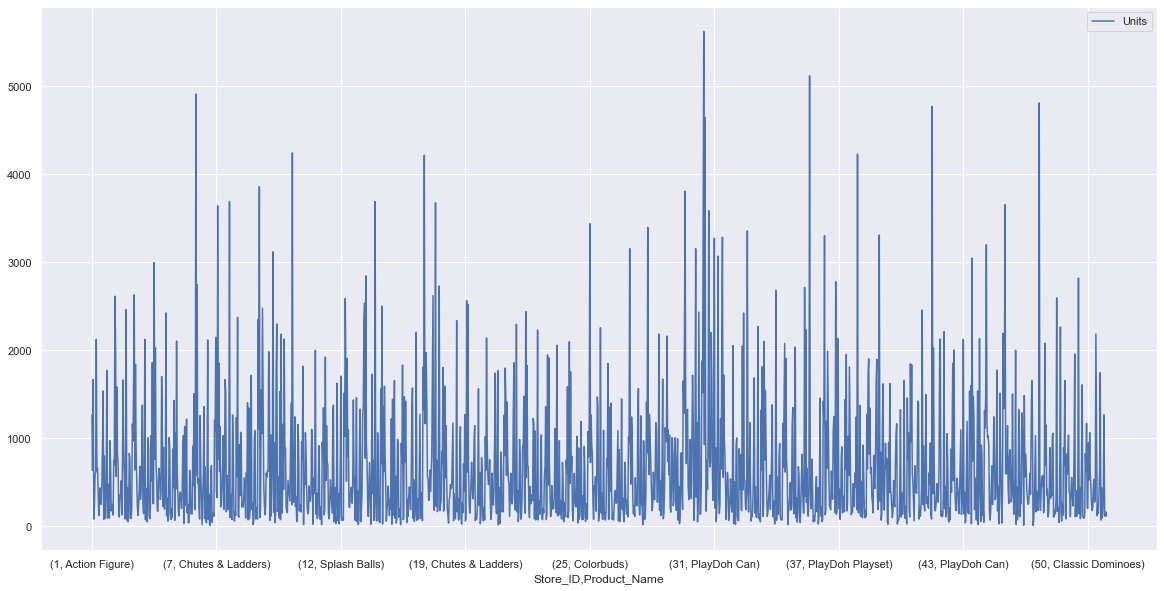

In [12]:
sales_by_store = mt_sales.groupby(["Store_ID" , "Product_ID"])["Units"].sum() # sum all sales units for each product
productUnits_by_store = pd.DataFrame(sales_by_store).reset_index()            # set indexing to default to create three columns of the three params
productUnits_by_store.set_index("Store_ID")  # set Store_ID column to be the index

mt_productNames = pd.DataFrame(mt_p[["Product_ID", "Product_Name"]])  # obtain Product Name and ID columns from mt_p
mt_storeNames = pd.DataFrame(mt_store[["Store_ID", "Store_Name"]])    # obtain Store Name and ID columns from mt_store


mt_data = pd.merge(productUnits_by_store , mt_storeNames, on = "Store_ID")
mt_data2 = pd.merge(mt_data , mt_productNames, on = "Product_ID", how= "outer")


df = pd.DataFrame(mt_data2.groupby(["Store_ID", "Product_Name"])["Units"].max()) # stores the number of units sold from every product in each one the stores (multiindexing mt_data2)
df

df.plot()
plt.show()

In [13]:
prod_highSale = pd.DataFrame(columns=['Store_ID', 'Product_Name', 'Units_Sold']) # declare an empty dataframes to store the new rows in it

# /* for each store in the 50 stores, find and return the product name that makes the highest units sold 
# and also return number of highest number of units sold, 
# and store all these data in prod_highSale dataframe */
for i in range(1 , 51):
    
    # returns a Boolean value of whether there is a value in the column Units_Sold where Store_ID == i && Product_Nam
    a = df.index.get_level_values('Store_ID') == i   
    
    # returns a tuble of (Store_ID ==i , Product_Name) that has maximum Units_Sold for store with Store_ID == i
    b = df.iloc[a].idxmax() 
    
    # locates and returns the the number of Units_Sold of a product with Name b[0][1] in store_ID == b[0][0]
    units = df.loc[(b[0][0] , b[0][1]),:][0]
    
    # adds rows data to the store DataFrame
    prod_highSale.loc[i] = [b[0][0], b[0][1], units]
prod_highSale.head()

,Store_ID,Product_Name,Units_Sold
1,1,Deck Of Cards,2124
2,2,Barrel O' Slime,2614
3,3,Colorbuds,2629
4,4,Colorbuds,2996
5,5,Deck Of Cards,2104


In [14]:
# from the prod_highSale dataframe above, determining how many times each of the products was ranked top selling and in how many stores 
highSaleProds = pd.DataFrame(prod_highSale.groupby(["Product_Name"]).count()).reset_index()

#rename column store_ID to NSPRHS (Number of Stores where Product Ranked High Sales)
#rename column Units_Sold to NTPRH (Number of Times Product Ranked High)
highSaleProds.rename(columns = {"Store_ID": "NSPRHS" , "Units_Sold":"NTPRH"} , inplace = True) 
highSaleProds

,Product_Name,NSPRHS,NTPRH
0,Barrel O' Slime,11,11
1,Colorbuds,17,17
2,Deck Of Cards,2,2
3,Glass Marbles,2,2
4,Lego Bricks,1,1
5,Mini Ping Pong Set,3,3
6,PlayDoh Can,12,12
7,Splash Balls,2,2


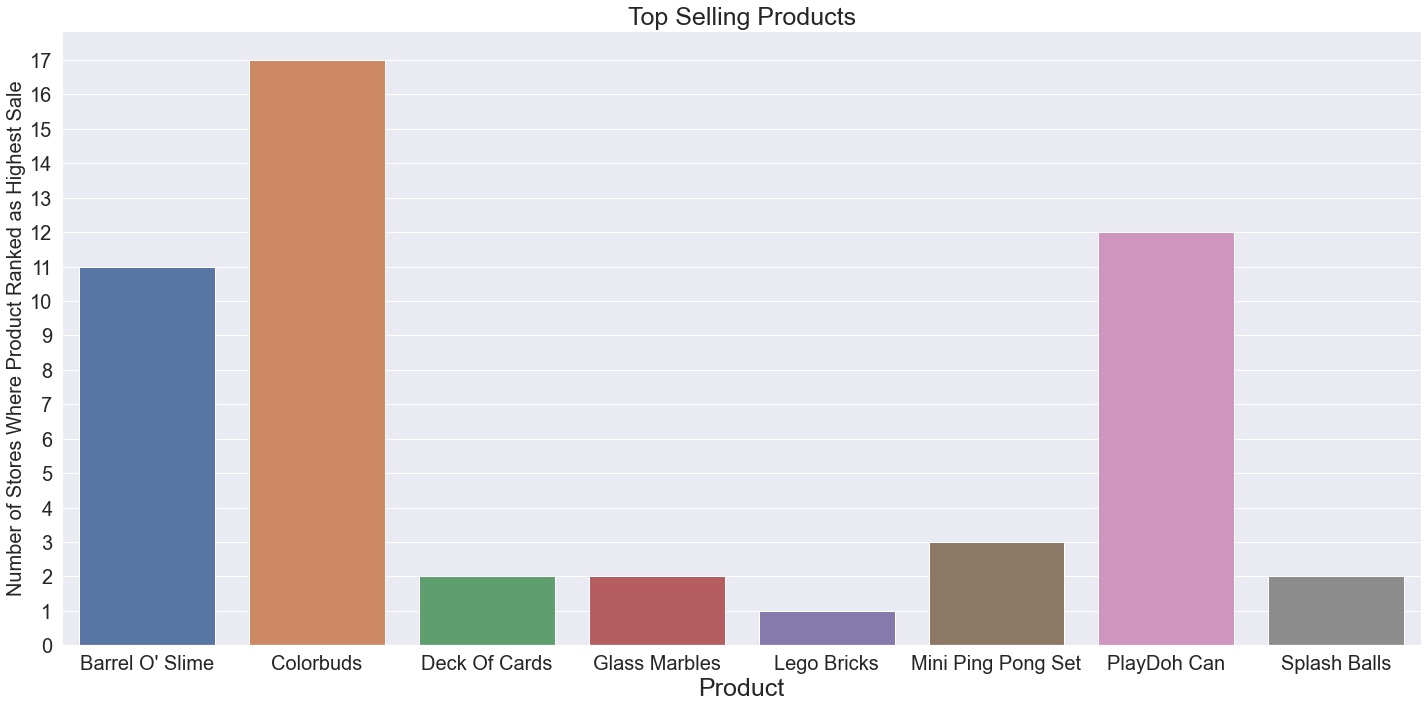

In [15]:
# top selling products graph

sns.set(rc={"figure.figsize":(20,10)})

ax3 = sns.barplot( x = highSaleProds["Product_Name"], y = highSaleProds["NSPRHS"])

ax3.set_xlabel("Product" , fontsize = 25)
ax3.set_ylabel("Number of Stores Where Product Ranked as Highest Sale" , fontsize = 20 )
ax3.set_title("Top Selling Products" , fontsize = 25)
plt.yticks(np.arange(0, 18 , step =1), fontsize = 20)
plt.xticks(fontsize = 20)
#plt.xticks(rotation = 90)
plt.tight_layout()
fig3 = plt.gcf()
plt.show()
#fig3.savefig("Top Selling Products" , dpi = 1200)

## Sales Units Distribution for Top Three Selling Products Across All Stores

In [16]:
# copy mt_data2 data into new dataframe called prodData
prodData = mt_data2.copy() 
prodData.set_index(["Product_Name" , "Store_Name"] , inplace = True)
prodData

Store_ID  Product_ID  Units
Product_Name  Store_Name                                           
Action Figure Maven Toys Guadalajara 1         1           1   1262
              Maven Toys Monterrey 1           2           1    746
              Maven Toys Guadalajara 2         3           1   1158
              Maven Toys Saltillo 1            4           1   1027
              Maven Toys La Paz 1              5           1    876
...                                          ...         ...    ...
Uno Card Game Maven Toys Hermosillo 2         41          35    202
              Maven Toys Hermosillo 3         42          35     72
              Maven Toys Saltillo 2           48          35    122
              Maven Toys Culiacan 1           49          35    122
              Maven Toys Guanajuato 3         50          35    115

[1631 rows x 3 columns]

### ColorBuds

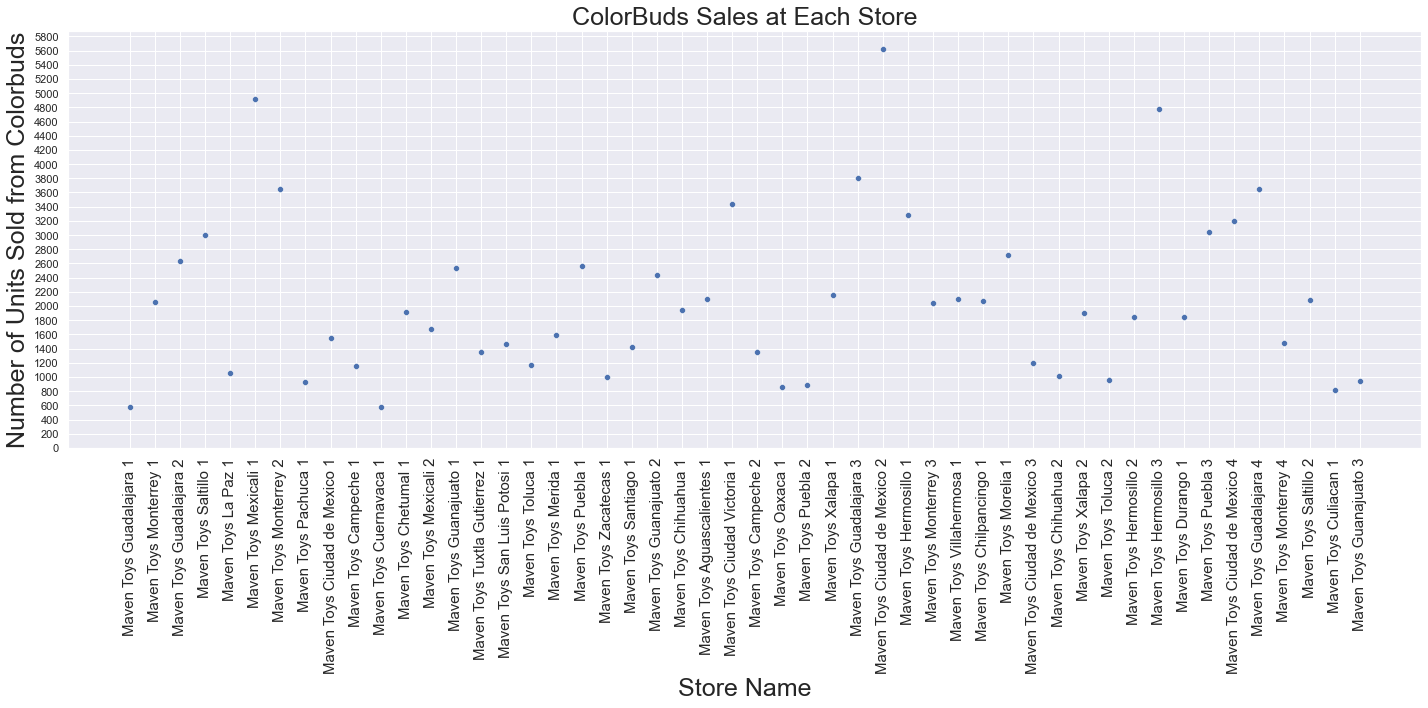

In [17]:
# colorbuds sales units distribution across stores

colorbuds_storeDist = pd.DataFrame(prodData.loc[("Colorbuds" , slice(None)), "Units"]).reset_index("Store_Name")


ax4 = sns.scatterplot(y = colorbuds_storeDist.Units , x = colorbuds_storeDist.Store_Name )
plt.xticks(rotation = 90, fontsize = 15)
#plt.yticks(fontsize = 10)
plt.yticks(np.arange(0 , 6000 , step = 200))
plt.xlabel("Store Name" ,fontsize = 25)
plt.ylabel("Number of Units Sold from Colorbuds" ,fontsize = 25)
#sns.displot(colorbuds_storeDist.Units , kind = "kde")
#plt.xticks(rotation = 90
ax4.set_title("ColorBuds Sales at Each Store" , fontsize = 25)
plt.tight_layout()
fig4 = plt.gcf()
plt.show()
#fig4.savefig("ColorBuds Can Sales at Each Store" , dpi = 1200)

### PlayDoh Can

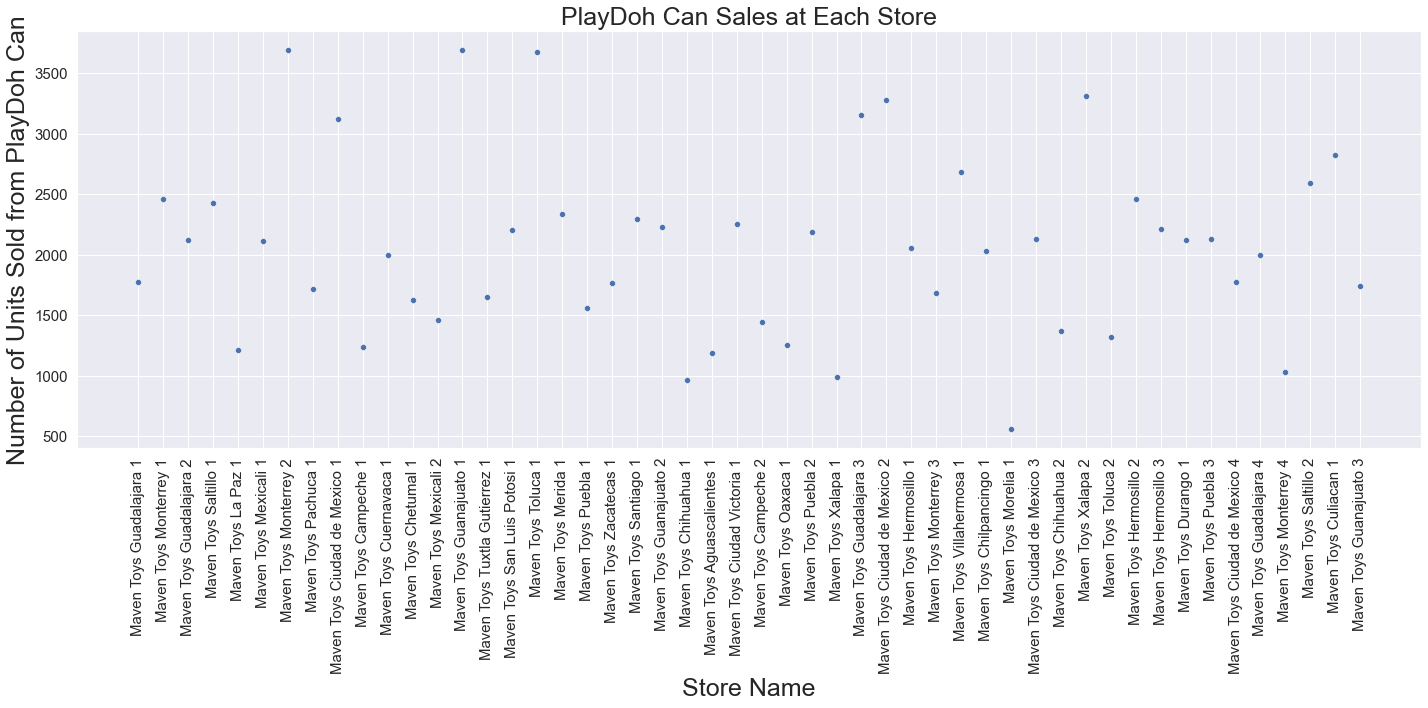

In [18]:
# Sales units distribution for "Playdoh Can" across all store 

pdCan = pd.DataFrame(prodData.loc[("PlayDoh Can" , slice(None)), "Units"]).reset_index("Store_Name")


ax5 = sns.scatterplot(x = pdCan.Store_Name , y= pdCan.Units )
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Store Name" , fontsize = 25)
plt.ylabel("Number of Units Sold from PlayDoh Can", fontsize = 25)
ax5.set_title("PlayDoh Can Sales at Each Store", fontsize = 25)
plt.tight_layout()
fig5 = plt.gcf()
plt.show()
#fig5.savefig("PlayDoh Can Sales at Each Store" , dpi = 1200)

### Barrel O' Slime

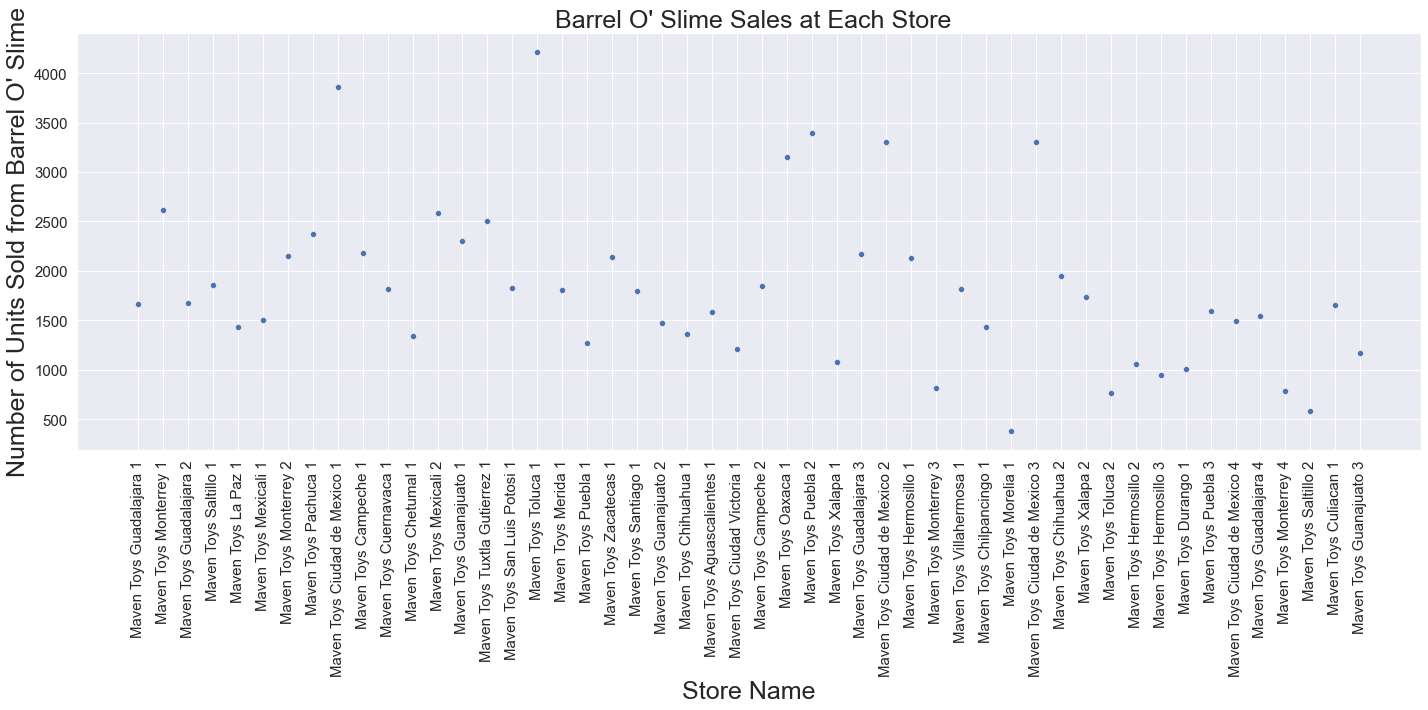

In [19]:
# Sales units distribution for Barrel O' Slime across all store

bSlime = pd.DataFrame(prodData.loc[("Barrel O\' Slime", slice(None)), "Units"]).reset_index("Store_Name")


ax6 = sns.scatterplot(x = bSlime.Store_Name , y= bSlime.Units )
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Store Name" , fontsize = 25)
plt.ylabel("Number of Units Sold from Barrel O\' Slime", fontsize = 25)
ax6.set_title(" Barrel O\' Slime Sales at Each Store", fontsize = 25)
plt.tight_layout()
fig6 = plt.gcf()
plt.show()
#fig6.savefig("Barrel O\' Slime Can Sales at Each Store" , dpi = 1200)

## Annual Sales Distribution for Top Three Selling Products:
preparing sales data to visualize sales distributions in years 2017 and 2018 for top three selling products

In [20]:
sales = pd.merge(mt_sales, mt_p[["Product_Name" , "Product_ID"]])

sales_dates = pd.DataFrame(sales.groupby([ sales.Date.dt.year ,sales.Date.dt.month, "Product_Name"])[["Sale_ID" , "Store_ID"]].count())
sales_dates.rename_axis(index =["Year" , "Month", "Product_Name"] , inplace = True)
sales_dates.rename(columns ={"Sale_ID":"Sales_Per_Month" , "Store_ID" : "Number_of_Stores"}, inplace= True)
sales_dates.reset_index(inplace = True)

# efficient way to change the format of Month from numberic to string 
# is to create a dataframe with the month number and its corresponding name 
# and merge that dataframe with the sales_dates on month number (on = "Month")

Month_Name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dic = {"Month" : [1,2,3,4,5,6,7,8,9,10,11,12], "Month_Name": Month_Name}
months_names = pd.DataFrame(data = dic)

sales_dates2 = pd.merge(sales_dates ,months_names, on="Month" , how = "left")
sales_dates2.set_index(["Year" , "Month_Name" , "Product_Name"] , inplace= True)
sales_dates2

Month  Sales_Per_Month  \
Year Month_Name Product_Name                                    
2017 January    Action Figure              1             2945   
                Animal Figures             1             1262   
                Barrel O' Slime            1               76   
                Chutes & Ladders           1              161   
                Classic Dominoes           1              276   
...                                      ...              ...   
2018 September  Splash Balls               9             1371   
                Supersoaker Water Gun      9              233   
                Teddy Bear                 9              217   
                Toy Robot                  9              473   
                Uno Card Game              9              148   

                                       Number_of_Stores  
Year Month_Name Product_Name                             
2017 January    Action Figure                      2945  
                Animal Figures                     1262  
                Barrel O' Slime                      76  
                Chutes & Ladders                    161  
                Classic Dominoes                    276  
...                                                 ...  
2018 September  Splash Balls                       1371  
                Supersoaker Water Gun               233  
                Teddy Bear                          217  
                Toy Robot                           473  
                Uno Card Game                       148  

[649 rows x 3 columns]

### Colorbuds

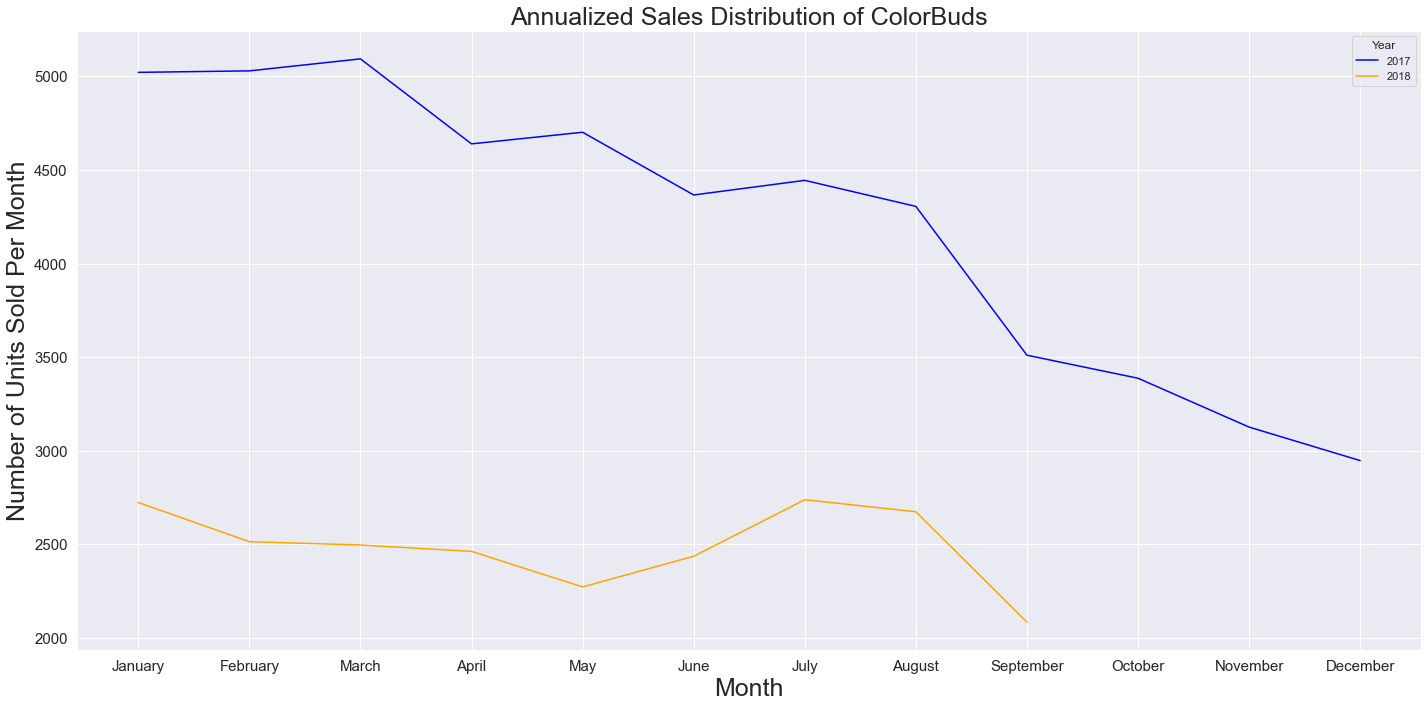

In [21]:
# colorbuds distribution through the year 2017
colorbuds_17 = pd.DataFrame(sales_dates2.loc[(2017,slice(None), "Colorbuds"), "Sales_Per_Month"])
colorbuds_17.reset_index(inplace = True)

# colorbuds distribution through the year 2018
colorbuds_18 = pd.DataFrame(sales_dates2.loc[(2018,slice(None), "Colorbuds"), "Sales_Per_Month"])
colorbuds_18.reset_index(inplace = True)

# combine both years data
colorbuds_years = pd.merge(colorbuds_17, colorbuds_18 , how="outer")

# graphing annual sales distribution
ax7 = sns.lineplot(x='Month_Name', y='Sales_Per_Month', hue='Year', data=colorbuds_years , palette = ["blue" , "orange"])
ax7.set_title("Annualized Sales Distribution of ColorBuds", fontsize = 25)
plt.xlabel("Month", fontsize= 25)
plt.ylabel("Number of Units Sold Per Month", fontsize= 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig7 = plt.gcf()
plt.show()
#fig7.savefig("Annualized Sales Distribution of ColorBuds" , dpi = 1200)

### PlayDoh Can

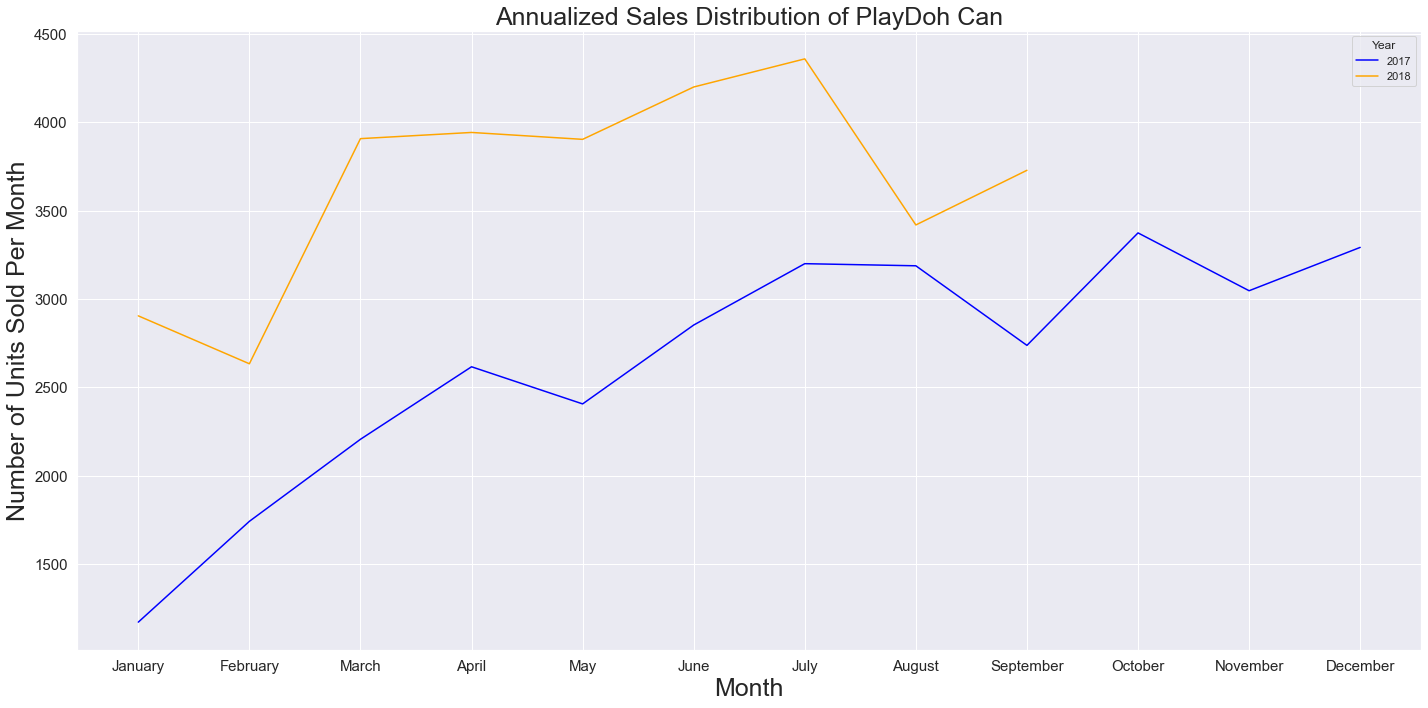

In [22]:
# Playdoh Can distribution through the year 2017
pdCan_17 = pd.DataFrame(sales_dates2.loc[(2017,slice(None), "PlayDoh Can"), "Sales_Per_Month"])
pdCan_17.reset_index(inplace = True)

# Playdoh Can distribution through the year 2018
pdCan_18 = pd.DataFrame(sales_dates2.loc[(2018,slice(None), "PlayDoh Can"), "Sales_Per_Month"])
pdCan_18.reset_index(inplace = True)

# combine both years data
pdCan_years = pd.merge(pdCan_17, pdCan_18 , how="outer")


# graphing annual sales distribution
ax8 = sns.lineplot(x='Month_Name', y='Sales_Per_Month', hue='Year', data=pdCan_years , palette = ["blue" , "orange"])
ax8.set_title("Annualized Sales Distribution of PlayDoh Can", fontsize = 25)
plt.xlabel("Month", fontsize= 25)
plt.ylabel("Number of Units Sold Per Month", fontsize= 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig8 = plt.gcf()
plt.show()
#fig8.savefig("Annualized Sales Distribution of PlayDoh Can" , dpi = 1200)

### Barrel O' Slim

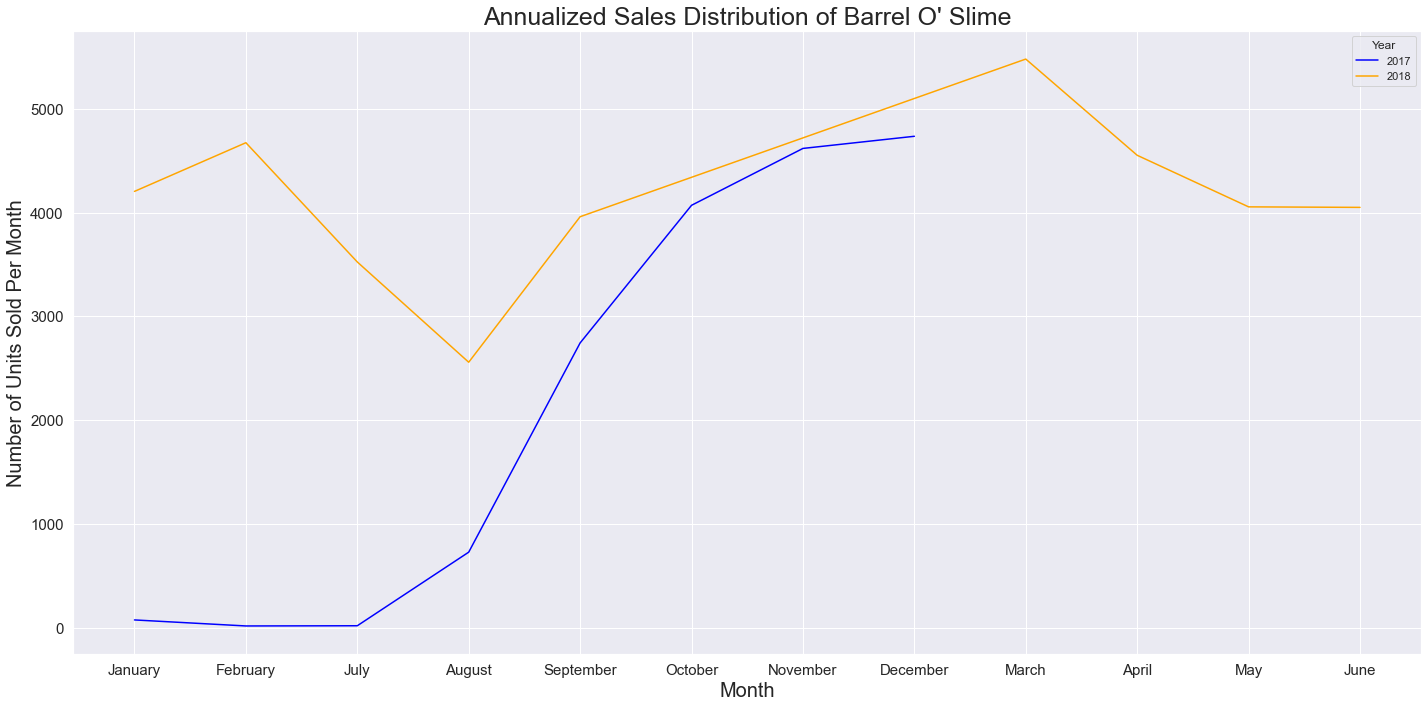

In [23]:
# "Barrel O' Slime" distribution through the year 2017
bSlime_17 = pd.DataFrame(sales_dates2.loc[(2017,slice(None), "Barrel O\' Slime"), "Sales_Per_Month"])
bSlime_17.reset_index(inplace = True)

# "Barrel O' Slime" distribution through the year 2018
bSlime_18 = pd.DataFrame(sales_dates2.loc[(2018,slice(None), "Barrel O\' Slime"), "Sales_Per_Month"])
bSlime_18.reset_index(inplace = True)

# combine both years data
bSlime_years = pd.merge(bSlime_17, bSlime_18 , how="outer")

# graphing annual sales distribution
ax9 = sns.lineplot(x='Month_Name', y='Sales_Per_Month', hue='Year', data=bSlime_years , palette = ["blue" , "orange"])
ax9.set_title("Annualized Sales Distribution of Barrel O\' Slime", fontsize = 25)
plt.xlabel("Month", fontsize= 20)
plt.ylabel("Number of Units Sold Per Month", fontsize= 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig9 = plt.gcf()
plt.show()
#fig9.savefig("Annualized Sales Distribution of Barrel O\' Slime" , dpi = 1200)

## Analysis on Inventory 

### Ways to calculate of inventory turn: 
*  Inventory turn = sales / Inventory cost
* Inventory turn = COGS / Inventory cost
* Inventory turn = COGS / average inventor(Stock_on_hands)

In [24]:
#1) Invturn=sales/Inventory cost
mt_products["Stock_Avble"] = mt_inv.Stock_On_Hand
mt_products["Inventory_Cost"]= mt_products.Product_Cost*mt_products.Stock_Avble

In [25]:
# Calculating (Inventory Turn = COG Sold / Inventory Cost)
# and add to the dataset
mt_products["Inventory_Turn"] = mt_products.COGS/mt_products.Inventory_Cost

In [26]:
# Calculate Days of Inventory (DSI)
# Measures how many days it takes for inventory to turn into sales
# Numerator: The valuation of the inventory
# Denominator: The cost of goods sold during the specified time period
mt_products["DSI"] = (1 / mt_products.Inventory_Turn) * (365)         # 365 calculates the daily

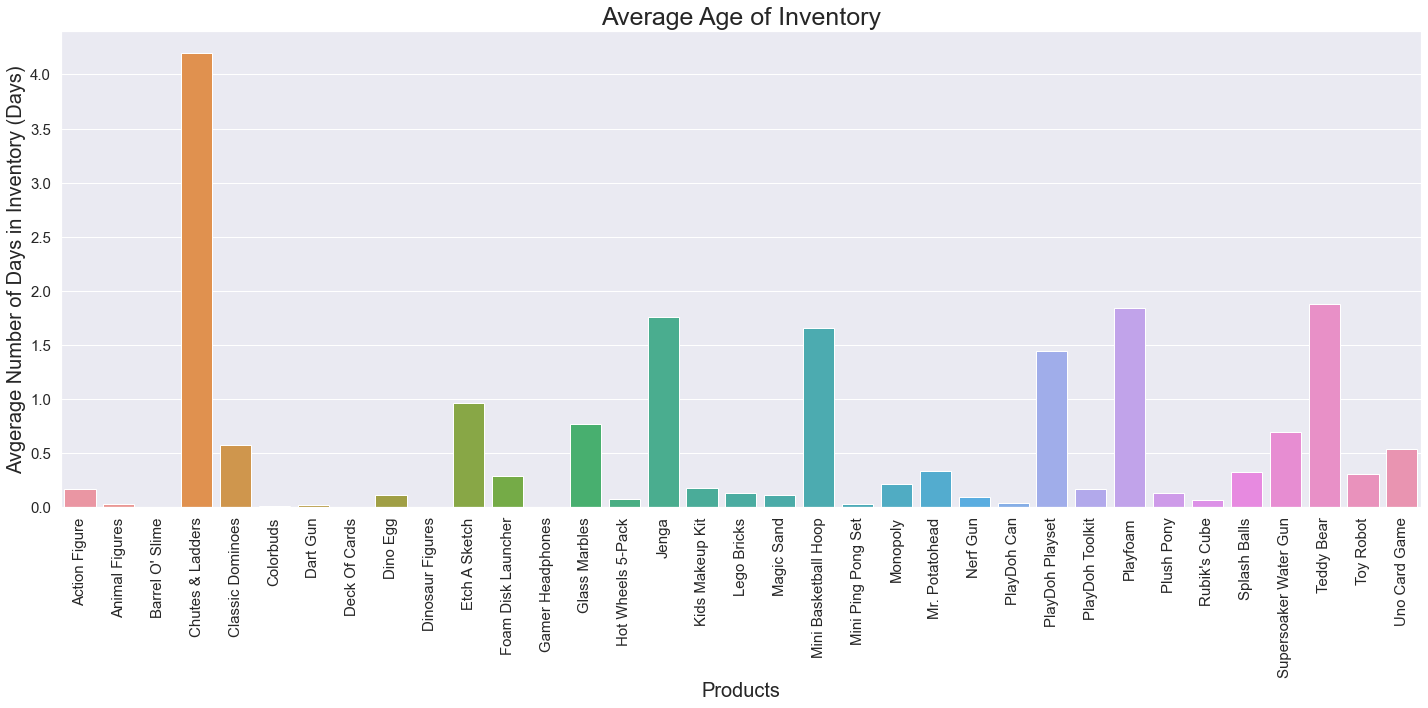

In [27]:
sns.set(rc={"figure.figsize":(20,10)}) #sets size of the graph
ax10 = sns.barplot( x = mt_products["Product_Name"], y = mt_products["DSI"] )

ax10.set_xlabel("Products" , fontsize = 20) # label graph x axis with Product
ax10.set_ylabel("Avgerage Number of Days in Inventory (Days)", fontsize = 20)   # label graph y axis with Price
ax10.set_title("Average Age of Inventory", fontsize = 25 ) # add title to graph
plt.xticks(rotation = 90, fontsize = 15)   # rotate the products_Name along x by 90 degress for a better display
plt.yticks(fontsize = 15)
plt.tight_layout()
fig10 = plt.gcf()
plt.show()
#fig10.savefig("Average Age of Inventory" , dpi = 1200)